In [1]:
#import libraries
import numpy as np 
import pandas as pd 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#statistic
from statistics import mode

#Regular Expression
import re

#panda setting
pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 100) # Setting pandas to display a N number rows
pd.set_option('display.width', 100) # Setting pandas dataframe display width to N

#ignored warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
target = data_train.Survived

## Data Understanding

Features | Description
--------------|-------------
Survived      | Survived (1) or died (0)
Pclass        | Passenger's class
Name          | Passenger's name
Sex           | Passenger's sex
Age           | Passenger's age
SibSp         | Number of siblings/spouses aboard
Parch         | Number of parents/children aboard
Ticket        | Ticket number
Fare          | Fare
Cabin         | Cabin
Embarked      | Port of embarkation ( C-cherbourg, Q-Queenstown, S=Southampton)

In [3]:
#train set first 5 rows
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# test set first 5 rows
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

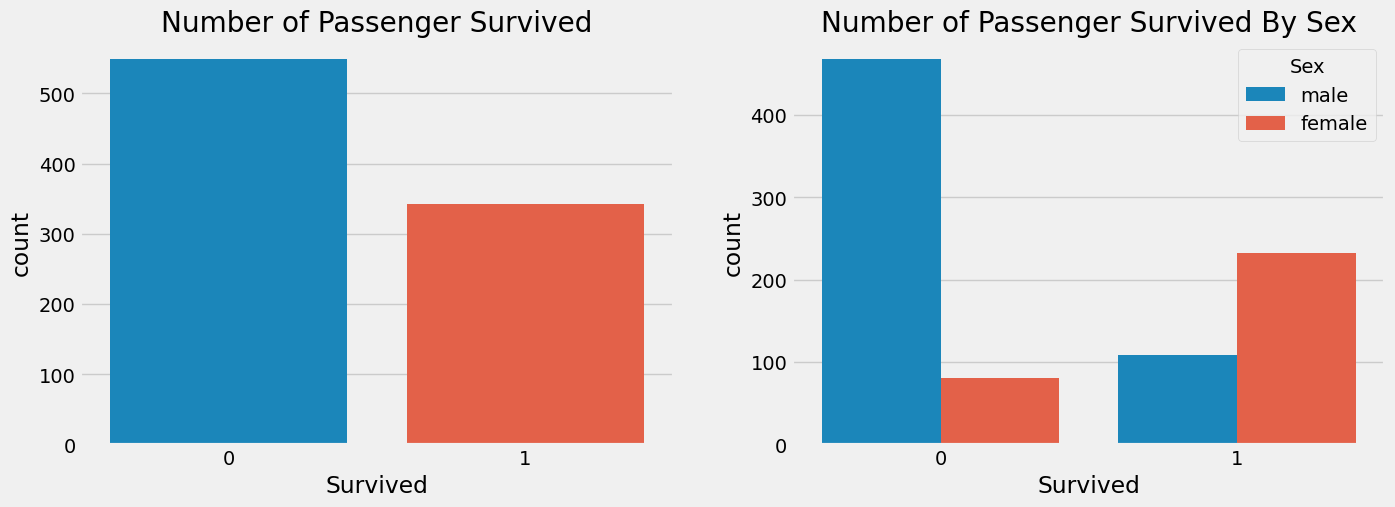

In [7]:
#Look at target feature first
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="Survived", data=data_train)
plt.title('Number of Passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=data_train)
plt.title('Number of Passenger Survived By Sex');

Plot above shown that passengers had a higher non-survival rate and Female are more likely to survive than Male.

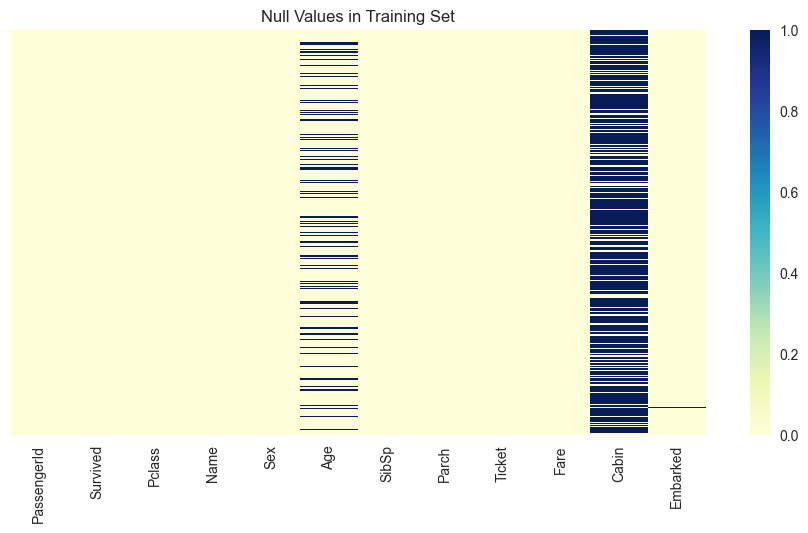

In [8]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(data_train.isnull(), yticklabels = False, cmap='YlGnBu')
plt.title('Null Values in Training Set');

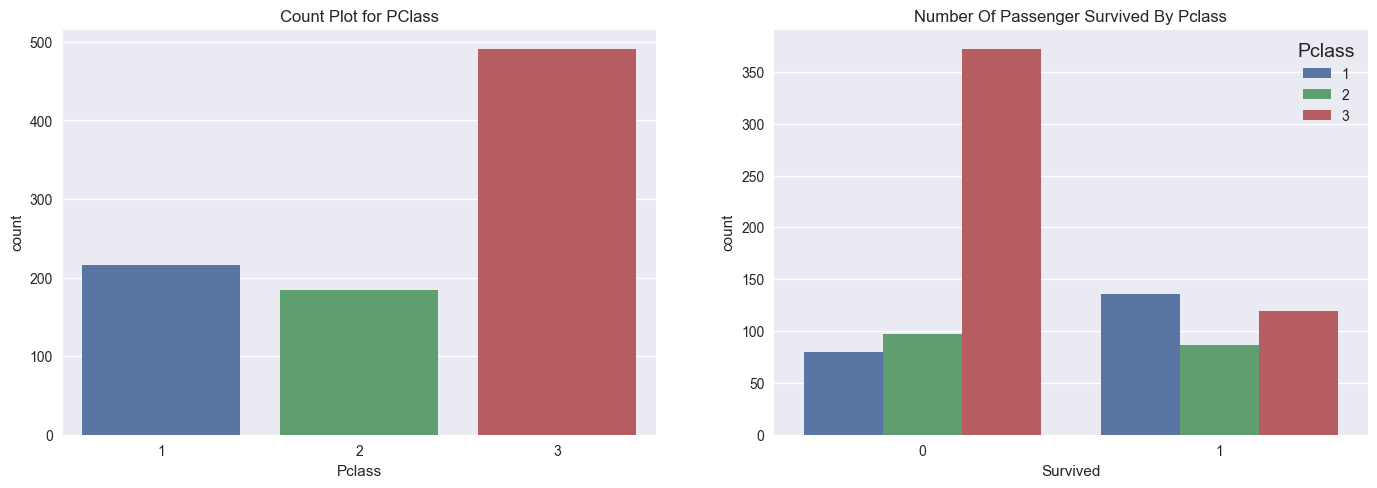

In [9]:
# Survival by Pclass
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=data_train)
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=data_train)
plt.title('Number Of Passenger Survived By Pclass');

In [10]:
pclass1 = data_train[data_train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = data_train[data_train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = data_train[data_train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some statistical data!\n")
print("Pclass-1: {:.1f}% People Survived".format(pclass1))
print("Pclass-2: {:.1f}% People Survived".format(pclass2))
print("Pclass-3: {:.1f}% People Survived".format(pclass3))

Lets look at some statistical data!

Pclass-1: 63.0% People Survived
Pclass-2: 47.3% People Survived
Pclass-3: 24.2% People Survived


<AxesSubplot: ylabel='Frequency'>

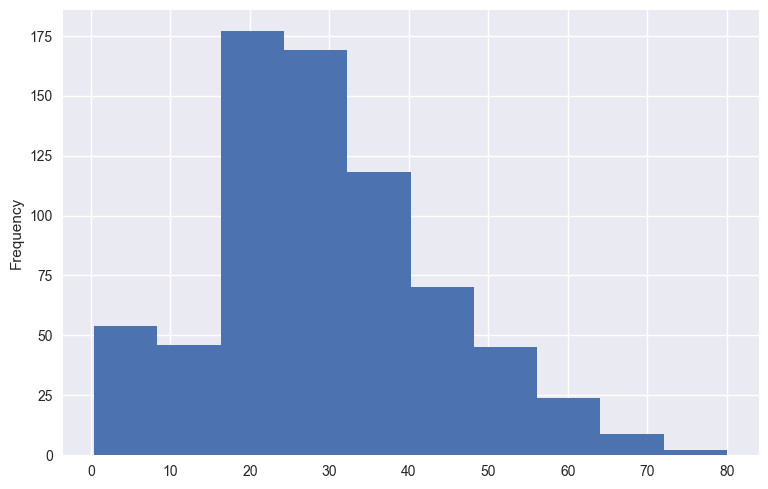

In [11]:
data_train['Age'].plot(kind='hist')

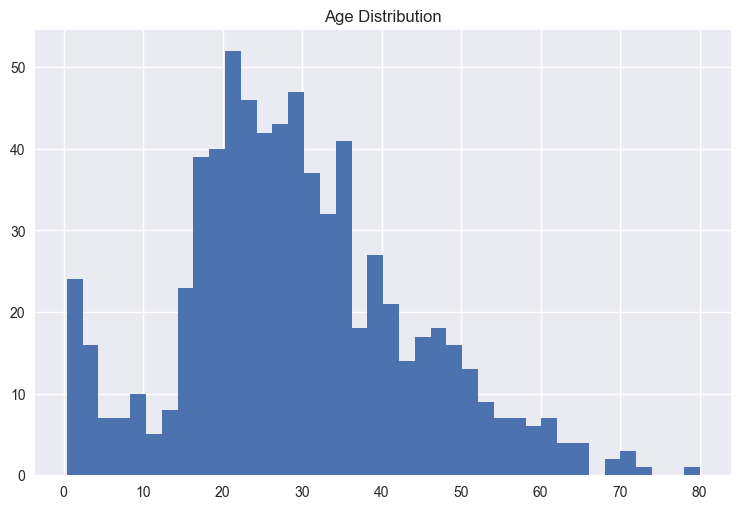

In [12]:
data_train['Age'].hist(bins=40)
plt.title('Age Distribution');

**Age column has non-uniform data and many outliers**

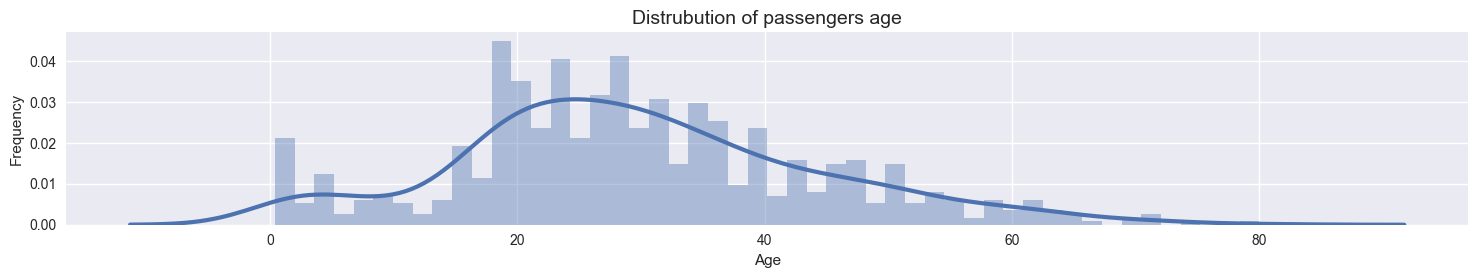

In [13]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(data_train[(data_train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

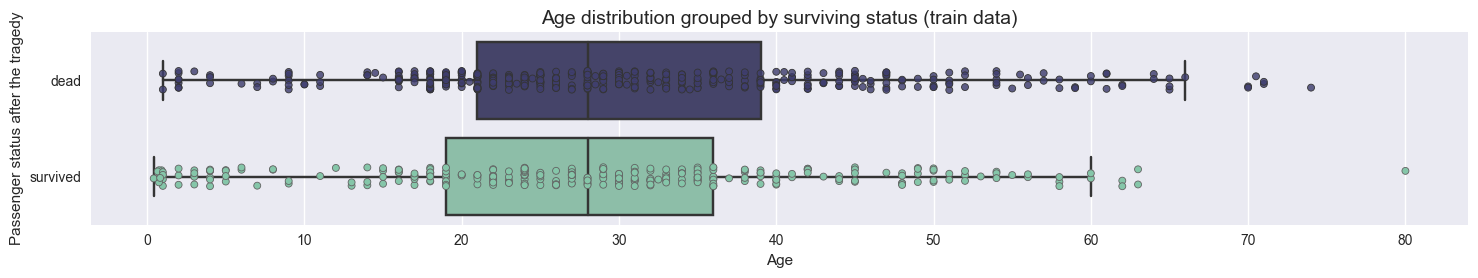

In [14]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = data_train,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = data_train,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['dead', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

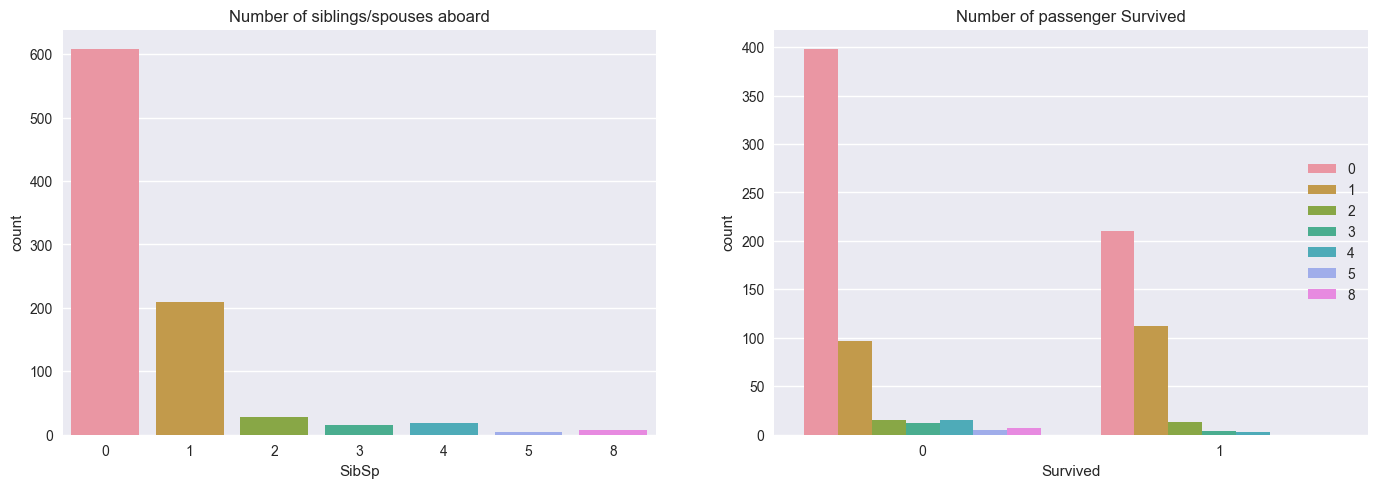

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='SibSp', data=data_train)
plt.title('Number of siblings/spouses aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=data_train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

**Looks like single person Non-survived count is almost double than survived, while others have 50-50 % ratio**

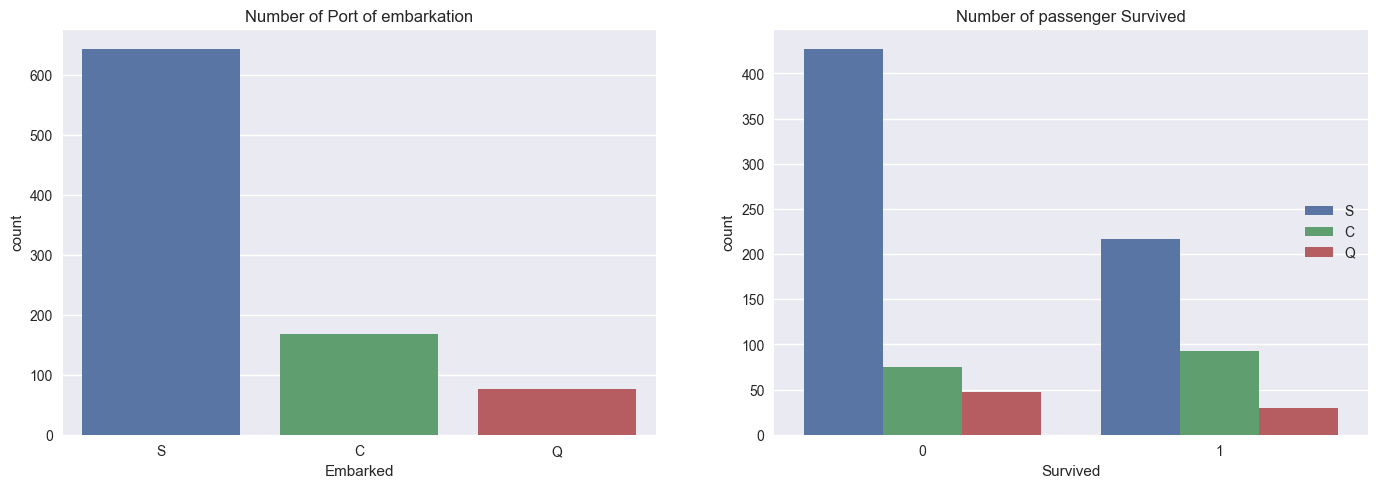

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Embarked',data=data_train)
plt.title('Number of Port of embarkation');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=data_train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

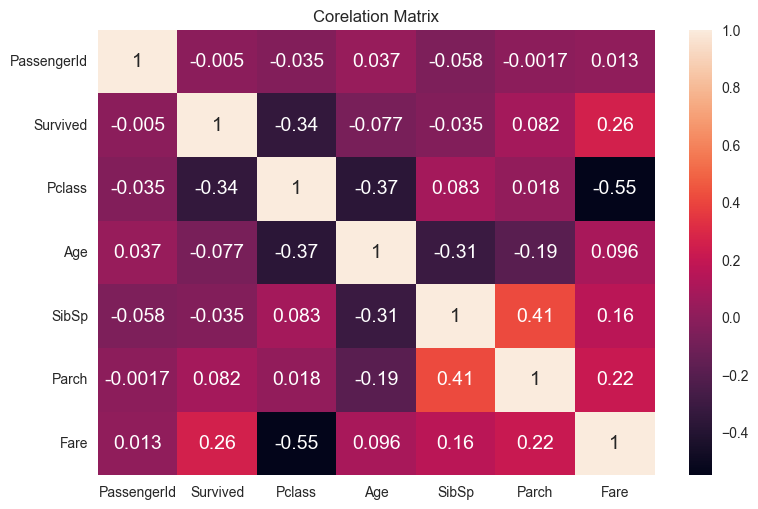

In [17]:
sns.heatmap(data_train.corr(), annot=True)
plt.title('Corelation Matrix');

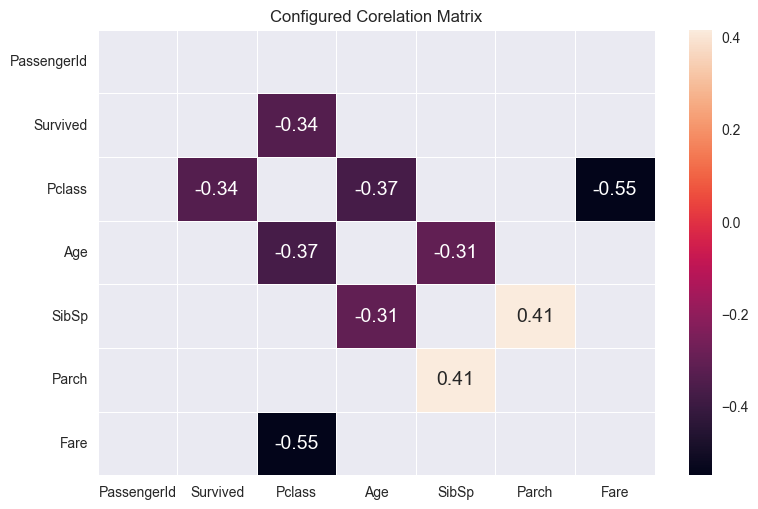

In [18]:
corr = data_train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

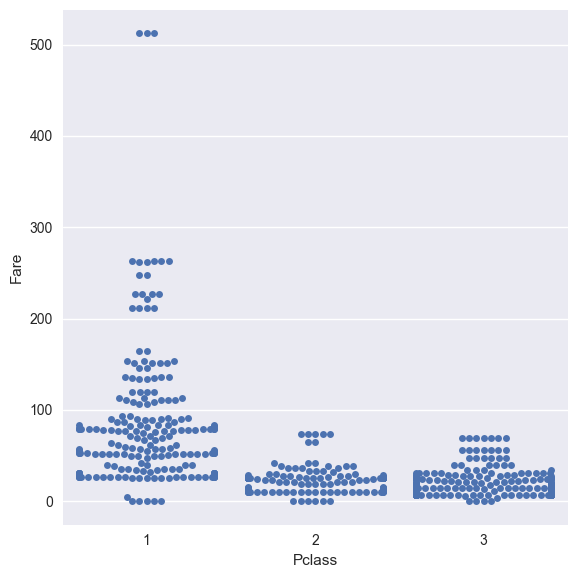

In [19]:
# Fare vs Pclass
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=data_train, height = 6)

plt.tight_layout()

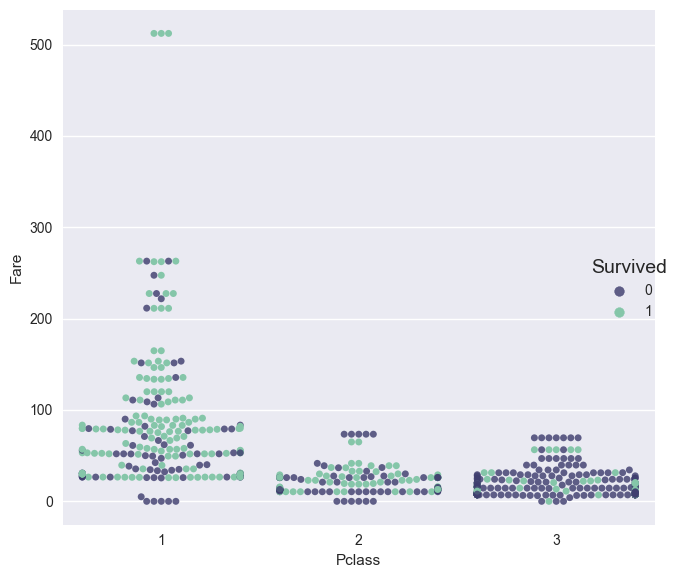

In [20]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=data_train, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

## Data Preprocessing

In [21]:
# Check any null vaues for train data
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Check of any null values for Test data
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot: >

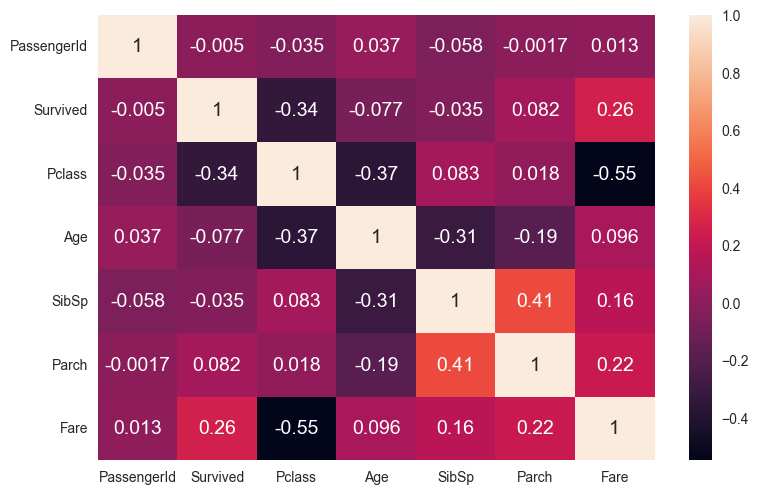

In [23]:
sns.heatmap(data_train.corr(), annot=True)

**Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class**

In [24]:
# Age
data_train.loc[data_train.Age.isnull(), 'Age'] = data_train.groupby("Pclass").Age.transform('median')
data_test.loc[data_test.Age.isnull(), 'Age'] = data_test.groupby("Pclass").Age.transform('median')

data_train['Age'] = data_train['Age'].astype(int)
data_test['Age'] = data_test['Age'].astype(int)

# Embarked
embarked_counts = data_train['Embarked'].value_counts()
print(embarked_counts)
breakline = "\n----------------------------------------------------------------\n"

print(breakline)                  
data_train['Embarked'] = data_train['Embarked'].fillna(mode(data_train['Embarked']))
data_test['Embarked'] = data_test['Embarked'].fillna(mode(data_test['Embarked']))

# Fare
data_train['Fare']  = data_train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
data_test['Fare']  = data_test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

data_train['Fare'] = data_train['Fare'].round(2)
data_test['Fare'] = data_test['Fare'].round(2)

# Cabin
cabin_counts = data_train.Cabin.value_counts()
print(cabin_counts)
print(breakline)  
data_train['Cabin'] = data_train['Cabin'].fillna('Unknown')
data_test['Cabin'] = data_test['Cabin'].fillna('Unknown')

S    644
C    168
Q     77
Name: Embarked, dtype: int64

----------------------------------------------------------------

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

----------------------------------------------------------------



In [25]:
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


# Feature Engineering

In [28]:
data_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [29]:
# Convert male = 1, female=0
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_train['Sex'] = le.fit_transform(data_train['Sex'].astype(str))
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.92,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,Unknown,S


In [30]:
# Embarked
embarked_unique = data_train.Embarked.unique()
print(embarked_unique)
print(breakline)
#One hot encoding
data_train = pd.get_dummies(data_train, columns=['Embarked'])
data_test = pd.get_dummies(data_test, columns=['Embarked'])
data_train.columns

# Cabin
cabin_unique = data_train.Cabin.unique()
print(cabin_unique)
print(breakline)
data_train['Cabin'] = data_train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
data_test['Cabin'] = data_test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
print(cabin_unique)
print(breakline)
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
data_train['Cabin'] = data_train['Cabin'].map(cabin_category)
data_test['Cabin'] = data_test['Cabin'].map(cabin_category)

# Name
name = data_train.Name
print(name)
print(breakline)
data_train['Name'] = data_train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
data_test['Name'] = data_test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
name_unique = data_train['Name'].unique().tolist()
print(name_unique)
print(breakline)

# Title
# Rename name to title
data_train.rename(columns={'Name' : 'Title'}, inplace=True)
# Replace all except Mr Mrs Miss Master as other
data_train['Title'] = data_train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
data_test.rename(columns={'Name' : 'Title'}, inplace=True)
data_test['Title'] = data_test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

title_value_counts = data_train['Title'].value_counts(normalize = True) * 100
print(title_value_counts)
print(breakline)
#One hot encoding
data_train = pd.get_dummies(data_train, columns=['Title'])
data_test = pd.get_dummies(data_test, columns=['Title'])

# Calculate familySize for each passenger
data_train['familySize'] = data_train['SibSp'] + data_train['Parch'] + 1
data_test['familySize'] = data_test['SibSp'] + data_test['Parch'] + 1

# calculate the "isalone" variable
data_train['isalone'] = (data_train['SibSp'] + data_train['Parch'] + 1).apply(lambda x: 1 if x == 1 else 0)
data_test['isalone'] = (data_test['SibSp'] + data_test['Parch'] + 1).apply(lambda x: 1 if x == 1 else 0)


['S' 'C' 'Q']

----------------------------------------------------------------

['Unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' '

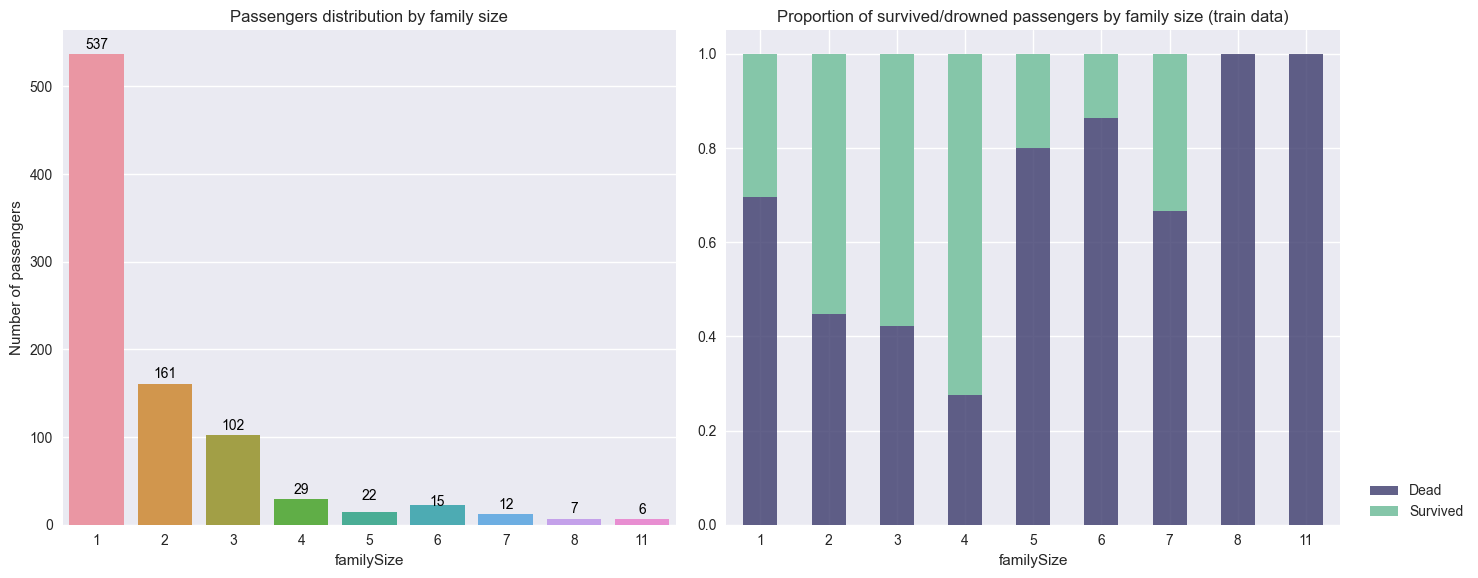

In [31]:
fig = plt.figure(figsize = (15,6))

ax1 = fig.add_subplot(1,2,1)
ax = sns.countplot(x='familySize',data=data_train, ax = ax1)

# calculate passengers for each category
labels = (data_train['familySize'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(1,2,2)
d = data_train.groupby('familySize')['Survived'].value_counts(normalize=True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Dead', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    int32  
 4   Age           891 non-null    int32  
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    int64  
 10  Embarked_C    891 non-null    uint8  
 11  Embarked_Q    891 non-null    uint8  
 12  Embarked_S    891 non-null    uint8  
 13  Title_Master  891 non-null    uint8  
 14  Title_Miss    891 non-null    uint8  
 15  Title_Mr      891 non-null    uint8  
 16  Title_Mrs     891 non-null    uint8  
 17  Title_Other   891 non-null    uint8  
 18  familySize    891 non-null    

In [33]:
# Calculate the correlation between all pairs of columns
corr_matrix = data_train.corr()

# Select the columns that are most strongly correlated with 'survived'
surv_corr = corr_matrix['Survived'].abs()
best_columns = surv_corr[surv_corr > 0].sort_values(ascending=False)

# Print the selected columns and their corresponding correlation values in descending order of correlation with 'survived'
print(best_columns[1:].to_frame(name='Correlation with Survived'))
# print(corr_matrix['Survived'].sort_values(ascending=False))


              Correlation with Survived
Title_Mr                       0.549199
Sex                            0.543351
Title_Mrs                      0.339040
Pclass                         0.338481
Title_Miss                     0.327093
Cabin                          0.301116
Fare                           0.257305
isalone                        0.203367
Embarked_C                     0.168240
Embarked_S                     0.149683
Title_Master                   0.085221
Parch                          0.081629
Age                            0.047266
SibSp                          0.035322
Title_Other                    0.022030
familySize                     0.016639
PassengerId                    0.005007
Embarked_Q                     0.003650


In [34]:
# Drop redundant features
data_train = data_train.drop(['PassengerId','Pclass','Cabin','SibSp', 'Parch', 'Ticket','Title_Mr','Title_Mrs','Title_Miss','Title_Master','Title_Other','Embarked_C','Embarked_Q','Embarked_S'], axis = 1)
data_test = data_test.drop(['Pclass','Cabin','SibSp', 'Parch', 'Ticket','Title_Mr','Title_Mrs','Title_Miss','Title_Master','Title_Other','Embarked_C','Embarked_Q','Embarked_S'], axis = 1)

# data_train = data_train.drop(['PassengerId','Cabin','SibSp', 'Parch', 'Ticket'], axis = 1)
# data_test = data_test.drop(['Cabin','SibSp', 'Parch','Ticket'], axis = 1)

In [35]:
data_train.head()

,Survived,Sex,Age,Fare,familySize,isalone
0,0,1,22,7.25,2,0
1,1,0,38,71.28,2,0
2,1,0,26,7.92,1,1
3,1,0,35,53.10,2,0
4,0,1,35,8.05,1,1


# Supervised Model: Logistic Regression

**As target variable is discrete value(i.e 0 and 1) logistic regression is more likely to fit well the model**

In [36]:
x = data_train.drop(['Survived'],axis=1).values # Predictor value
y = data_train['Survived'].values # Target value

In [37]:
# Calculate distribution of target variable
target_dist = data_train['Survived'].value_counts(normalize=True)
target_dist
# unbalanced

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [38]:
# Build train test model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=33) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(623, 5)
(623,)
(268, 5)
(268,)


In [39]:
# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Logistic Regression Model
Train set score: 0.79
Test set score: 0.82
Elapsed time: 0.12 seconds

----------------------------------------------------------------

Evaluation
Accuarcy Score is: 0.82
Precision Score is :  0.79
Recall Score is :  0.73
Confusion Matrix
[[144  20]
 [ 28  76]]


Text(34.72222222222222, 0.5, 'True labels')

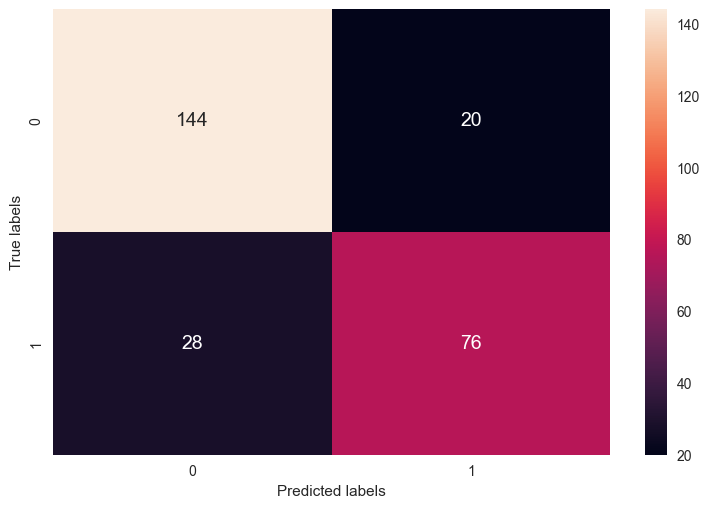

In [40]:
import time
start_time = time.time()
#Initialize, fit and predict 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=9)
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_test_scaled)

print("Logistic Regression Model")
# Train Test set score
print("Train set score: {:.2f}".format(logreg.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}" .format(logreg.score(x_test_scaled, y_test)))

# Time to execute
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

print(breakline)
print("Evaluation")
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score
#Print Accuarcy Score - more for balanced dataset
AccScore_lr = accuracy_score(y_test, y_pred)
AccScore_lr = round(AccScore_lr ,2)
print("Accuarcy Score is:", AccScore_lr)

# Print Precision Score
PrecisionScore_lr = precision_score(y_test, y_pred)
PrecisionScore_lr = round(PrecisionScore_lr,2)
print('Precision Score is : ', PrecisionScore_lr)

# Print Recall Score
RecallScore_lr = recall_score(y_test,y_pred)
RecallScore_lr = round(RecallScore_lr,2)
print('Recall Score is : ', RecallScore_lr)
print("Confusion Matrix")
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
# TP, FN (Type 2 Error)
# FP (Type 1 Error) , TN
sns.heatmap(cm_lr, annot = True, fmt=".0f")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

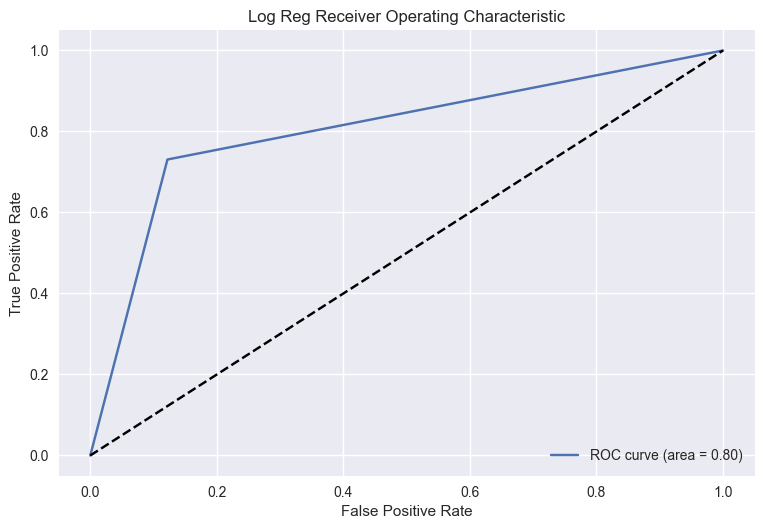

In [41]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

#Receiver Operating Characteristic Curve (ROC AUC) for binary classification problems
roc_auc =  roc_auc_score(y_test, y_pred)

# calculate the FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log Reg Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 0.9 ≤ AUC	Excellent
# 0.8 ≤ AUC < 0.9	Good
# 0.7 ≤ AUC < 0.8	Fair
# 0.6 ≤ AUC < 0.7	Poor
# 0.5 ≤ AUC < 0.6	Fail

In [42]:
# Calculate the absolute values of the coefficients
coef_abs = np.abs(logreg.coef_)

# Normalize the coefficients to sum to 1
coef_norm = coef_abs / np.sum(coef_abs)

print('Log Regression Features Importance In Sorted Order')
# Feature Name
feature_names = data_train.columns[1:]
importances = list(zip(feature_names, coef_norm[0]))
importances_sorted = sorted(importances, key=lambda x: abs(x[1]), reverse=True)
for feature, importance in importances_sorted:
    print(f"{feature}: {importance:.4f}")


Log Regression Features Importance In Sorted Order
Sex: 0.3335
Fare: 0.2700
familySize: 0.2127
Age: 0.0922
isalone: 0.0916


## Model: SVC

(623, 5)
(623,)
(268, 5)
(268,)

----------------------------------------------------------------

SVC-RBF Model
Train set score: 0.820
Test set score: 0.854
Elapsed time: 0.08 seconds

----------------------------------------------------------------

Evaluation
Accuarcy Score is: 0.85
Precision Score is :  0.84
Recall Score is :  0.78
Confusion Matrix
[[148  16]
 [ 23  81]]


Text(34.72222222222222, 0.5, 'True labels')

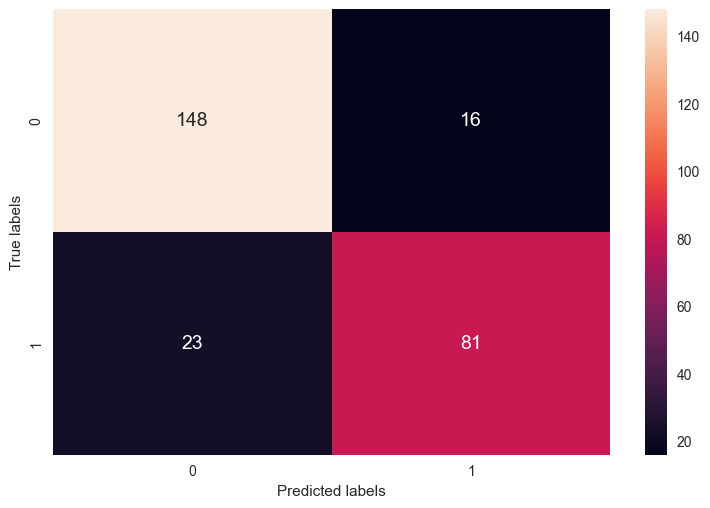

In [43]:
# Build train test model
from sklearn.model_selection import train_test_split
x_train_svc,x_test_svc,y_train_svc,y_test_svc = train_test_split(x,y,test_size=0.30, random_state=33) 

print(x_train_svc.shape)
print(y_train_svc.shape)
print(x_test_svc.shape)
print(y_test_svc.shape)

print(breakline)
print("SVC-RBF Model")

# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled_svc = scaler.fit_transform(x_train_svc)
x_test_scaled_svc = scaler.transform(x_test_svc)
import time
start_time = time.time()

# SVC
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=9)
svc.fit(x_train_scaled_svc, y_train)
y_pred_svc = svc.predict(x_test_scaled_svc)

# Train Test set score
print("Train set score: {:.3f}".format(svc.score(x_train_scaled_svc, y_train)))
print("Test set score: {:.3f}" .format(svc.score(x_test_scaled_svc, y_test)))

# Time to execute
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

print(breakline)
print("Evaluation")
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score
#Print Accuarcy Score - more for balanced dataset
acc_svc = accuracy_score(y_test_svc, y_pred_svc)
acc_svc = round(acc_svc ,2)
print("Accuarcy Score is:", acc_svc)

# Print Precision Score
pre_svc = precision_score(y_test_svc, y_pred_svc)
pre_svc = round(pre_svc,2)
print('Precision Score is : ', pre_svc)

# Print Recall Score
recall_svc = recall_score(y_test_svc,y_pred_svc)
recall_svc = round(recall_svc,2)
print('Recall Score is : ', recall_svc)

print("Confusion Matrix")
cm_svc = confusion_matrix(y_test_svc, y_pred_svc)
print(cm_svc)
# TP, FN (Type 2 Error)
# FP (Type 1 Error) , TN
sns.heatmap(cm_svc, annot = True, fmt=".0f")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

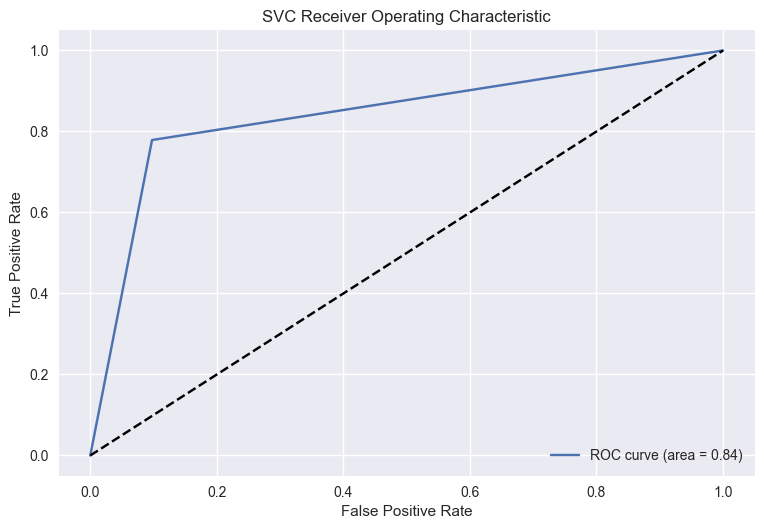

In [44]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

#Receiver Operating Characteristic Curve (ROC AUC) for binary classification problems
roc_auc =  roc_auc_score(y_test_svc, y_pred_svc)

# calculate the FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test_svc, y_pred_svc)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importance
result = permutation_importance(svc, x_train_scaled_svc, y_train_svc, n_repeats=10, random_state=42)

print('SVC Features Importance (Sorted Order)')
# Print the feature importance scores
importances = [(feature_name, result.importances_mean[i]) for i, feature_name in enumerate(data_train.columns[1:])]
importances_sorted = sorted(importances, key=lambda x: abs(x[1]), reverse=True)
for feature, importance in importances_sorted:
    print(f"{feature}: {importance:.4f}")


SVC Features Importance (Sorted Order)
Sex: 0.2456
familySize: 0.0369
Age: 0.0257
isalone: 0.0146
Fare: 0.0127


## Model : Random Forest Classifier

(623, 5)
(623,)
(268, 5)
(268,)

----------------------------------------------------------------

RFC Model
RFC Train set score: 0.99
RFC Test set score: 0.80
Elapsed time: 0.38 seconds

----------------------------------------------------------------

Evaluation
Accuarcy Score is: 0.8
Precision Score is :  0.78
Recall Score is :  0.67
Confusion Matrix
[[144  20]
 [ 34  70]]


Text(34.72222222222222, 0.5, 'True labels')

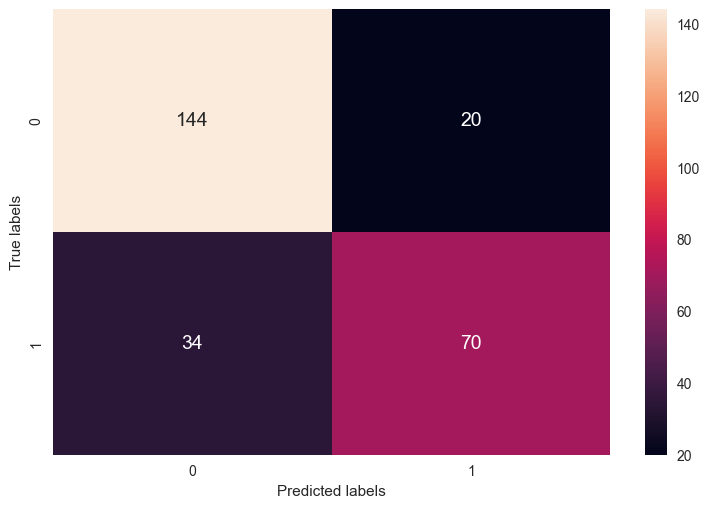

In [46]:
# Build train test model
from sklearn.model_selection import train_test_split
x_train_rfc,x_test_rfc,y_train_rfc,y_test_rfc = train_test_split(x,y,test_size=0.30, random_state=33) 

print(x_train_rfc.shape)
print(y_train_rfc.shape)
print(x_test_rfc.shape)
print(y_test_rfc.shape)

print(breakline)
# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled_rfc = scaler.fit_transform(x_train_rfc)
x_test_scaled_rfc = scaler.transform(x_test_rfc)

import time
start_time = time.time()

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=9)
rfc.fit(x_train_scaled, y_train_rfc)
y_pred_rfc = rfc.predict(x_test_scaled)

print("RFC Model")
# Train Test set score
print("RFC Train set score: {:.2f}".format(rfc.score(x_train_scaled, y_train)))
print("RFC Test set score: {:.2f}" .format(rfc.score(x_test_scaled, y_test)))

# Time to execute
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

print(breakline)
print("Evaluation")
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score
#Print Accuarcy Score - more for balanced dataset
acc_rfc = accuracy_score(y_test_rfc, y_pred_rfc)
acc_rfc = round(acc_rfc ,2)
print("Accuarcy Score is:", acc_rfc)

# Print Precision Score
pre_rfc = precision_score(y_test_rfc, y_pred_rfc)
pre_rfc = round(pre_rfc,2)
print('Precision Score is : ', pre_rfc)

# Print Recall Score
recall_rfc = recall_score(y_test_rfc,y_pred_rfc)
recall_rfc = round(recall_rfc,2)
print('Recall Score is : ', recall_rfc)

print("Confusion Matrix")
cm_rfc = confusion_matrix(y_test_rfc, y_pred_rfc)
print(cm_rfc)
# TP, FN (Type 2 Error)
# FP (Type 1 Error) , TN
sns.heatmap(cm_rfc, annot = True, fmt=".0f")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

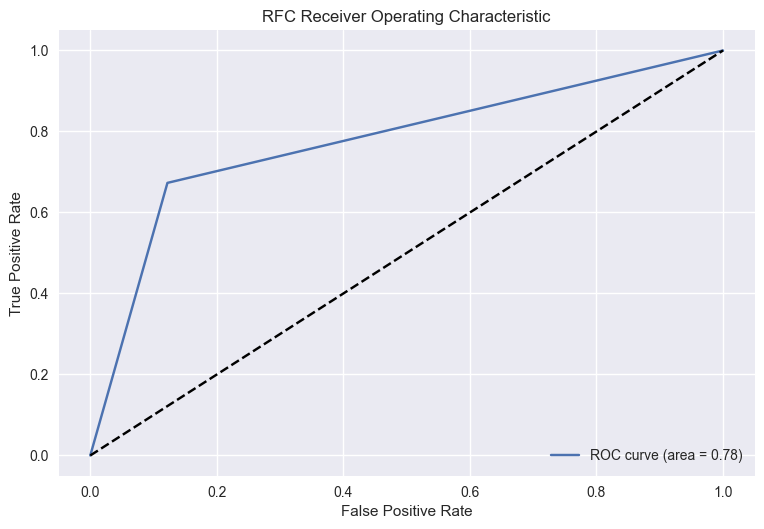

In [47]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

#Receiver Operating Characteristic Curve (ROC AUC) for binary classification problems
roc_auc =  roc_auc_score(y_test_rfc, y_pred_rfc)

# calculate the FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test_rfc, y_pred_rfc)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [48]:
# Get the feature importances
importances = rfc.feature_importances_
print('RFC Features Importance (Sorted Order)')
importances = rfc.feature_importances_
feature_names = data_train.columns[1:]
importances_sorted, feature_names_sorted = zip(*sorted(zip(importances, feature_names), key=lambda x: abs(x[0]), reverse=True))
for feature, importance in zip(feature_names_sorted, importances_sorted):
    print(f"{feature}: {importance:.4f}")


RFC Features Importance (Sorted Order)
Fare: 0.3867
Age: 0.2831
Sex: 0.2376
familySize: 0.0783
isalone: 0.0144


## Model: CNN

In [49]:
# Build train test model
from sklearn.model_selection import train_test_split
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn = train_test_split(x,y,test_size=0.30, random_state=33) 

print(x_train_cnn.shape)
print(y_train_cnn.shape)
print(x_test_cnn.shape)
print(y_test_cnn.shape)

# Feature Scaling, Normalizaiton
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled_cnn = scaler.fit_transform(x_train_cnn)
x_test_scaled_cnn = scaler.transform(x_test_cnn)

import time
start_time = time.time()

from tensorflow import keras

model = keras.Sequential([
    
    ## reshaping the input entries
    keras.layers.Dense(50, input_shape=(5,), activation='relu'),  
    keras.layers.Dropout(0.50),    ## to avoid overfitting and underfiting

    ## creating the hidden layer
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.70),    ##  to avoid overfitting and underfiting
    
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dropout(0.70),     ## to avoid overfitting and underfiting
 
    
    ## final neural layer
    keras.layers.Dense(1,activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',  ## since output in 0 or 1
             metrics=['accuracy'])

model.fit(x_train_scaled_cnn,y_train_cnn, epochs=100)

y_pred_cnn = model.predict(x_test_scaled_cnn)

cnn_score = model.evaluate(x_train_scaled_cnn,y_train_cnn)[1]
print("CNN Score:", cnn_score)

(623, 5)
(623,)
(268, 5)
(268,)
Epoch 1/100
20/20 [==============================] - 1s 5ms/step - loss: 0.7514 - accuracy: 0.4687
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6083
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6437
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6469
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6219 - accuracy: 0.6709
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6213 - accuracy: 0.6806
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.6581
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5819 - accuracy: 0.7063
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7464
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5

CNN Model
CNN Train set score: 0.99
CNN Test set score: 0.80
Elapsed time: 19.99 seconds

----------------------------------------------------------------

Evaluation
Accuracy: 0.84
Confusion Matrix
[[148  16]
 [ 28  76]]


Text(34.72222222222222, 0.5, 'True labels')

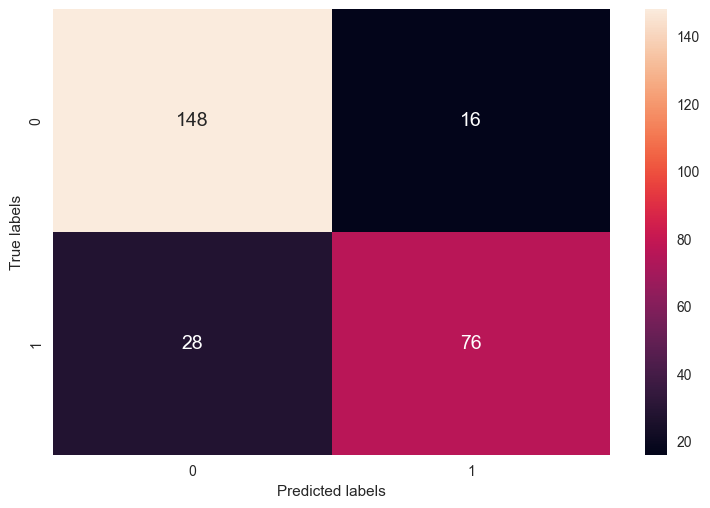

In [50]:
print("CNN Model")
# Train Test set score
print("CNN Train set score: {:.2f}".format(rfc.score(x_train_scaled_cnn, y_train_cnn)))
print("CNN Test set score: {:.2f}" .format(rfc.score(x_test_scaled_cnn, y_test_cnn)))

# Time to execute
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

print(breakline)
print("Evaluation")
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score
# Print test accuaracy
test_acc = model.evaluate(x_test_scaled_cnn, y_test_cnn, verbose=0)[1]
print(f"Accuracy: {test_acc:.2f}")

#Confusion Matrix
print("Confusion Matrix")
# Convert predicted probabilities to binary values
y_pred_cnn_binary = np.where(y_pred_cnn > 0.5, 1, 0)
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn_binary)
print(cm_cnn)
# TP, FN (Type 2 Error)
# FP (Type 1 Error) , TN
sns.heatmap(cm_cnn, annot = True, fmt=".0f")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

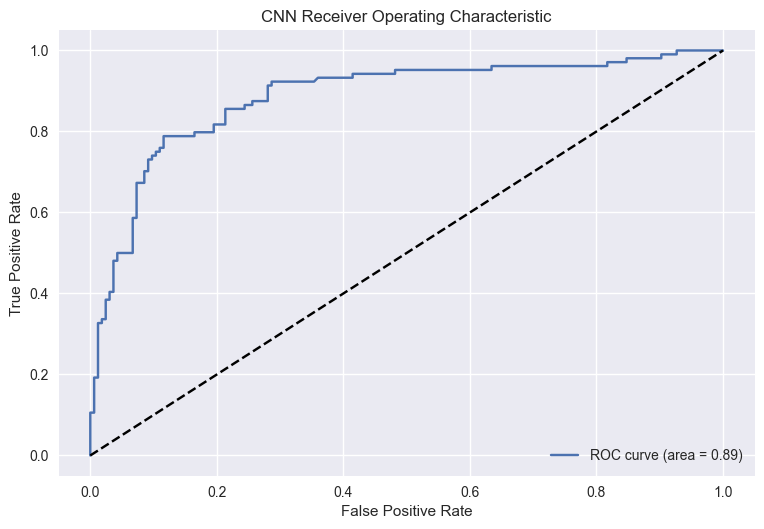

In [51]:
# # Compute the ROC-AUC score
# roc_auc = roc_auc_score(y_test_cnn, y_pred_cnn)
# print("ROC-AUC score: {:.2f}".format(roc_auc))

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

#Receiver Operating Characteristic Curve (ROC AUC) for binary classification problems
roc_auc =  roc_auc_score(y_test_cnn, y_pred_cnn)

# calculate the FPR and TPR at various thresholds
fpr, tpr, thresholds = roc_curve(y_test_cnn, y_pred_cnn)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Optimization

**Logistic Regression**

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a pipeline for logistic regression with scaling
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Define the hyperparameters to tune
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver': ['liblinear', 'saga'],
              'logisticregression__max_iter': [100, 1000, 10000]}

# Create a grid search object
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search.fit(x_train,y_train)

# Print the best hyperparameters
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))
print(f'Accuracy: {grid_search.score(x_test,y_test):.2f}')

Best hyperparameters: {'logisticregression__C': 10, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best score: 0.78
Accuracy: 0.82


**SVC - RBF**

In [53]:
# Define the parameter grid for hyperparameter tuning
param_grid_svc = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(x_train_scaled_svc, y_train_rfc)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: {}".format(grid_search_svc.best_params_))
print("Best score: {:.2f}".format(grid_search_svc.best_score_))
print(f'Accuracy: {grid_search_svc.score(x_test_scaled_svc,y_test_svc):.2f}')

Best hyperparameters: {'C': 1, 'gamma': 'scale'}
Best score: 0.81
Accuracy: 0.85


**Random Forest Classifier**

In [54]:
# Define the hyperparameters to tune
param_grid_rfc = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

from sklearn.model_selection import GridSearchCV
# Create a grid search object
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search_rfc.fit(x_train_scaled_rfc, y_train_rfc)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters: {}".format(grid_search_rfc.best_params_))
print("Best score: {:.2f}".format(grid_search_rfc.best_score_))
print(f'Accuracy: {grid_search_rfc.score(x_test_scaled_rfc,y_test_rfc):.2f}')

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.80
Accuracy: 0.87


**Convolutional Neural Network (CNN)**

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the function to create the model
def create_model(num_units=64, dropout_rate=0.2, activation='relu', optimizer='adam'):
    model = Sequential([
        Dense(num_units, activation=activation, input_shape=(5,)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper for the model
model = KerasClassifier(build_fn=create_model, verbose=1)

# Define the hyperparameter grid
param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.5],
    'activation': ['relu', 'sigmoid'],
    'num_units': [64, 128]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_result = grid.fit(x_train_scaled_cnn, y_train_cnn)

print(breakline)
# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best score: {:.2f}".format(grid_result.best_score_))
print(f'Accuracy: {grid_result.score(x_test_scaled_cnn,y_test_cnn):.2f}')

Epoch 1/50
26/26 [==============================] - 1s 2ms/step - loss: 0.6533 - accuracy: 0.6386
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7277
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7422
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7711
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7735
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7831
Epoch 7/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7928
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7831
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7880
Epoch 10/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7904
Epoch 11/50
26/26 [

26/26 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8000
Epoch 34/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7976
Epoch 35/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8072
Epoch 36/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8072
Epoch 37/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.7928
Epoch 38/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8024
Epoch 39/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.8024
Epoch 40/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8072
Epoch 41/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8072
Epoch 42/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8000
Epoch 43/50
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8000
Epoch 47/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8024
Epoch 48/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8024
Epoch 49/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8096
Epoch 50/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.8317
Epoch 1/50
26/26 [==============================] - 1s 2ms/step - loss: 0.6159 - accuracy: 0.7163
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7740
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7861
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7981
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7885
Epoch 6/50
26/26 [=========

26/26 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7957
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8005
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8005
Epoch 11/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8053
Epoch 12/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8053
Epoch 13/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8005
Epoch 14/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8005
Epoch 15/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8053
Epoch 16/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8029
Epoch 17/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8029
Epoch 18/50
26/26 [====

26/26 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8145
Epoch 41/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8193
Epoch 42/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8217
Epoch 43/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.8072
Epoch 44/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8169
Epoch 45/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8096
Epoch 46/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8120
Epoch 47/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8217
Epoch 48/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8120
Epoch 49/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8145
Epoch 50/50
13/13 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8145
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8169
Epoch 54/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8024
Epoch 55/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.8048
Epoch 56/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8217
Epoch 57/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8145
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8072
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8120
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8072
Epoch 61/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8120
Epoch 62/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7981
Epoch 15/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8005
Epoch 16/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8005
Epoch 17/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8029
Epoch 18/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8101
Epoch 19/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7981
Epoch 20/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8173
Epoch 21/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8029
Epoch 22/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8077
Epoch 23/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8053
Epoch 24/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8197
Epoch 97/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8317
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8125
Epoch 99/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8245
Epoch 100/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8019
Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 0.7287 - accuracy: 0.5494
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6024
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.6530
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.7181
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7446
Epoch 6/100
26/26

26/26 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8000
Epoch 59/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8024
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7976
Epoch 61/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8048
Epoch 62/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8096
Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8096
Epoch 64/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8120
Epoch 65/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.7928
Epoch 66/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8096
Epoch 67/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7904
Epoch 68/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8048
Epoch 21/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8072
Epoch 22/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8048
Epoch 23/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8024
Epoch 24/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8120
Epoch 25/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8120
Epoch 26/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8096
Epoch 27/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8096
Epoch 28/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8145
Epoch 29/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8145
Epoch 30/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8048
Epoch 84/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8048
Epoch 85/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8145
Epoch 86/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8072
Epoch 87/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8072
Epoch 88/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8096
Epoch 89/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8000
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8072
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8096
Epoch 92/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8193
Epoch 93/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8241
Epoch 46/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8241
Epoch 47/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8072
Epoch 48/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8145
Epoch 49/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8145
Epoch 50/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8169
Epoch 51/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8120
Epoch 52/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8313
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8265
Epoch 54/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8169
Epoch 55/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7957
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7981
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8053
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.8053
Epoch 11/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8077
Epoch 12/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8053
Epoch 13/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8053
Epoch 14/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8077
Epoch 15/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8053
Epoch 16/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8101
Epoch 17/100
26

26/26 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8293
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8269
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8245
Epoch 92/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8149
Epoch 93/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8293
Epoch 94/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8221
Epoch 95/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8245
Epoch 96/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8125
Epoch 97/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8341
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8197
Epoch 99/100


26/26 [==============================] - 1s 2ms/step - loss: 0.6088 - accuracy: 0.7157
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7614
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7494
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7855
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7783
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7952
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7831
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.8120
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7952
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7976
Epoch 11/50
26/26 [===========

26/26 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.8000
Epoch 15/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.8024
Epoch 16/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7952
Epoch 17/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8024
Epoch 18/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8000
Epoch 19/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.8048
Epoch 20/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8000
Epoch 21/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8000
Epoch 22/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8024
Epoch 23/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8120
Epoch 24/50
26/26 [===

26/26 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8072
Epoch 47/50
26/26 [==============================] - 0s 5ms/step - loss: 0.4490 - accuracy: 0.8024
Epoch 48/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8145
Epoch 49/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.8120
Epoch 50/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.8269
Epoch 1/50
26/26 [==============================] - 1s 2ms/step - loss: 0.6523 - accuracy: 0.6418
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7572
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7716
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.8029
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.8077
Epoch 6/50
26/26 [=========

26/26 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7957
Epoch 9/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7885
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7957
Epoch 11/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8053
Epoch 12/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.8053
Epoch 13/50
26/26 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7933
Epoch 14/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7957
Epoch 15/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8077
Epoch 16/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8077
Epoch 17/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8053
Epoch 18/50
26/26 [====

26/26 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7711
Epoch 21/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7928
Epoch 22/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7904
Epoch 23/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7663
Epoch 24/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7783
Epoch 25/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7735
Epoch 26/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7952
Epoch 27/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7807
Epoch 28/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7952
Epoch 29/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7880
Epoch 30/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8149
Epoch 84/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.8005
Epoch 85/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8077
Epoch 86/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8221
Epoch 87/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8149
Epoch 88/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8173
Epoch 89/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8125
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8149
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.8197
Epoch 92/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8125
Epoch 93/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7855
Epoch 46/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8072
Epoch 47/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7976
Epoch 48/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.7904
Epoch 49/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.8000
Epoch 50/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.8024
Epoch 51/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8072
Epoch 52/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7880
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8024
Epoch 54/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7880
Epoch 55/100


26/26 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7880
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7904
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.8072
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8048
Epoch 11/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.8000
Epoch 12/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7976
Epoch 13/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7976
Epoch 14/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7976
Epoch 15/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.7928
Epoch 16/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8145
Epoch 17/100
26

26/26 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8193
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8096
Epoch 91/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8241
Epoch 92/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8072
Epoch 93/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8096
Epoch 94/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8193
Epoch 95/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8120
Epoch 96/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8169
Epoch 97/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8193
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8096
Epoch 99/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8173
Epoch 52/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8173
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8221
Epoch 54/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8221
Epoch 55/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8077
Epoch 56/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8245
Epoch 57/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8245
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8149
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8221
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8149
Epoch 61/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8000
Epoch 14/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7904
Epoch 15/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7928
Epoch 16/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7807
Epoch 17/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7855
Epoch 18/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7855
Epoch 19/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7783
Epoch 20/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7952
Epoch 21/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8024
Epoch 22/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7855
Epoch 23/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8120
Epoch 96/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8096
Epoch 97/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8048
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7928
Epoch 99/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8072
Epoch 100/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.8317
Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 0.6256 - accuracy: 0.6635
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7452
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7644
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7885
Epoch 5/100
26/2

13/13 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7711
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7711
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7952
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7783
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7783
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.7759
Epoch 13/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7880
Epoch 14/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7807
Epoch 15/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7831
Epoch 16/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7880
Epoch 17/50
13/13 [=====

13/13 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7831
Epoch 21/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7855
Epoch 22/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7976
Epoch 23/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4720 - accuracy: 0.7904
Epoch 24/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7880
Epoch 25/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7928
Epoch 26/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7855
Epoch 27/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7783
Epoch 28/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7928
Epoch 29/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7952
Epoch 30/50
13/13 [===

13/13 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.8048
Epoch 34/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.8024
Epoch 35/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.8024
Epoch 36/50
13/13 [==============================] - 0s 7ms/step - loss: 0.4521 - accuracy: 0.8072
Epoch 37/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.8072
Epoch 38/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8072
Epoch 39/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4531 - accuracy: 0.7952
Epoch 40/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8000
Epoch 41/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7976
Epoch 42/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8048
Epoch 43/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8072
Epoch 47/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8048
Epoch 48/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.8145
Epoch 49/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.8000
Epoch 50/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.8269
Epoch 1/50
13/13 [==============================] - 1s 1ms/step - loss: 0.6522 - accuracy: 0.6226
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.7404
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.7500
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.7861
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.7957
Epoch 6/50
13/13 [===========

13/13 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.7952
Epoch 28/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8024
Epoch 29/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.8000
Epoch 30/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.8000
Epoch 31/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.8048
Epoch 32/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.8024
Epoch 33/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8072
Epoch 34/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.8000
Epoch 35/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.8000
Epoch 36/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8000
Epoch 37/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8072
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8096
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7976
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.8048
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.8096
Epoch 95/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8000
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8096
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8048
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8145
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4466 - accuracy: 0.8072
Epoch 100/100

13/13 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8072
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8024
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.8145
Epoch 55/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8145
Epoch 56/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.8120
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8072
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.8048
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8048
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8120
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8096
Epoch 62/100


13/13 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.7909
Epoch 15/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8005
Epoch 16/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8053
Epoch 17/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8005
Epoch 18/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8005
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7957
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7933
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8053
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8005
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.8029
Epoch 24/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8125
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8077
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8221
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8221
Epoch 100/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7971
Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.7373 - accuracy: 0.4410
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6458
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.7205
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7614
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7759
Epoch 6/100
13/13 [

13/13 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.8145
Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4483 - accuracy: 0.8145
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4458 - accuracy: 0.8120
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8024
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.8145
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8169
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.8120
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.8145
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8145
Epoch 67/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8096
Epoch 68/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.7976
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8096
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.8072
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8000
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8024
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8120
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8096
Epoch 27/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.8096
Epoch 28/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7976
Epoch 29/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8048
Epoch 30/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8120
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8048
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.7904
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8096
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8024
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8096
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8096
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8217
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.8000
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8096
Epoch 93/100


13/13 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.7928
Epoch 46/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.7928
Epoch 47/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7976
Epoch 48/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8000
Epoch 49/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.8072
Epoch 50/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7981
Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 0.7455 - accuracy: 0.4506
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.5036
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.5928
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6988
Epoch 5/50
13/13 [==========

13/13 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.7494
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7663
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7783
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7639
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7807
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7855
Epoch 13/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7711
Epoch 14/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5062 - accuracy: 0.7711
Epoch 15/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7904
Epoch 16/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7735
Epoch 17/50
13/13 [=====

13/13 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8024
Epoch 21/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7952
Epoch 22/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7928
Epoch 23/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7976
Epoch 24/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7831
Epoch 25/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7904
Epoch 26/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8024
Epoch 27/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7831
Epoch 28/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.7855
Epoch 29/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7855
Epoch 30/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.7952
Epoch 34/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8024
Epoch 35/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.7976
Epoch 36/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.7904
Epoch 37/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8048
Epoch 38/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8000
Epoch 39/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8048
Epoch 40/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7976
Epoch 41/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7952
Epoch 42/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7928
Epoch 43/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.8072
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.8096
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8096
Epoch 99/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8145
Epoch 100/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.8029
Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.7439 - accuracy: 0.4916
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5590
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6193
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6530
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6747
Epoch 6/100
13/13 [

13/13 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.8101
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8125
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8077
Epoch 61/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8125
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8053
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.8197
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4599 - accuracy: 0.8053
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8221
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8005
Epoch 67/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8269
Epoch 68/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7687
Epoch 21/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7855
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.8000
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.8024
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7880
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7855
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7928
Epoch 27/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7807
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7880
Epoch 29/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7855
Epoch 30/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8245
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8077
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8101
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8077
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8197
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8125
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8053
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8293
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8125
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8029
Epoch 93/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7952
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7952
Epoch 47/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7952
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.8000
Epoch 49/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7952
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8072
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.8072
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7880
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8072
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8024
Epoch 55/100


13/13 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7759
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.7904
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7976
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8000
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7855
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7855
Epoch 13/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7855
Epoch 14/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8024
Epoch 15/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.8000
Epoch 16/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7976
Epoch 17/100
13

13/13 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8265
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8169
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8145
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8096
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8048
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8096
Epoch 95/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8169
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8241
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8096
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.8096
Epoch 99/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8125
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4323 - accuracy: 0.8101
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8101
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.8197
Epoch 55/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8077
Epoch 56/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8101
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.8077
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8101
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8101
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4227 - accuracy: 0.8197
Epoch 61/100


26/26 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7596
Epoch 14/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7788
Epoch 15/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7500
Epoch 16/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7476
Epoch 17/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7644
Epoch 18/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7740
Epoch 19/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7861
Epoch 20/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7788
Epoch 21/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7837
Epoch 22/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7885
Epoch 23/50
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7807
Epoch 46/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7783
Epoch 47/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7880
Epoch 48/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7759
Epoch 49/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7711
Epoch 50/50
13/13 [==============================] - 1s 3ms/step - loss: 0.4892 - accuracy: 0.7740
Epoch 1/50
26/26 [==============================] - 1s 3ms/step - loss: 0.6537 - accuracy: 0.6458
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6819
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6795
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7012
Epoch 5/50
26/26 [========

26/26 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7253
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7325
Epoch 9/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7566
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7590
Epoch 11/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7639
Epoch 12/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7687
Epoch 13/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7783
Epoch 14/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7687
Epoch 15/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7590
Epoch 16/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7566
Epoch 17/50
26/26 [=====

26/26 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.8005
Epoch 40/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7957
Epoch 41/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7933
Epoch 42/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7837
Epoch 43/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7957
Epoch 44/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7885
Epoch 45/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7957
Epoch 46/50
26/26 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7981
Epoch 47/50
26/26 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.8005
Epoch 48/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7837
Epoch 49/50
26/26 [===

26/26 [==============================] - 1s 3ms/step - loss: 0.6887 - accuracy: 0.5759
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5783
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6217
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.6410
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.6892
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.6867
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.7181
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7253
Epoch 9/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7325
Epoch 10/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7229
Epoch 11/100
26/26 [=

26/26 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7831
Epoch 65/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7663
Epoch 66/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7831
Epoch 67/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7735
Epoch 68/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7735
Epoch 69/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7663
Epoch 70/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7807
Epoch 71/100
26/26 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7807
Epoch 72/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7807
Epoch 73/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7711
Epoch 74/100


26/26 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7783
Epoch 27/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7759
Epoch 28/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7735
Epoch 29/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7783
Epoch 30/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7807
Epoch 31/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7759
Epoch 32/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4968 - accuracy: 0.7855
Epoch 33/100
26/26 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7807
Epoch 34/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7759
Epoch 35/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7831
Epoch 36/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7880
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7807
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7687
Epoch 92/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7687
Epoch 93/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7855
Epoch 94/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.7952
Epoch 95/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7783
Epoch 96/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7711
Epoch 97/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7783
Epoch 98/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7759
Epoch 99/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7831
Epoch 52/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7807
Epoch 53/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7711
Epoch 54/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7759
Epoch 55/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7880
Epoch 56/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.7807
Epoch 57/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7759
Epoch 58/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7759
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7880
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7831
Epoch 61/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.8029
Epoch 14/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7812
Epoch 15/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7861
Epoch 16/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7909
Epoch 17/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7812
Epoch 18/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7837
Epoch 19/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7885
Epoch 20/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7812
Epoch 21/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7788
Epoch 22/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7837
Epoch 23/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7909
Epoch 96/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7885
Epoch 97/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7957
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7909
Epoch 99/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7909
Epoch 100/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7633
Epoch 1/100
26/26 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.6096
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.6361
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.6530
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.6916
Epoch 5/100
26/2

26/26 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7711
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7855
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7928
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7880
Epoch 61/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7735
Epoch 62/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7831
Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7904
Epoch 64/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7831
Epoch 65/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7783
Epoch 66/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7590
Epoch 67/100


26/26 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7373
Epoch 20/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7373
Epoch 21/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7373
Epoch 22/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7639
Epoch 23/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7639
Epoch 24/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7494
Epoch 25/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5452 - accuracy: 0.7542
Epoch 26/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5609 - accuracy: 0.7470
Epoch 27/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7663
Epoch 28/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7590
Epoch 29/50
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7542
Epoch 33/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7566
Epoch 34/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7735
Epoch 35/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5120 - accuracy: 0.7880
Epoch 36/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7542
Epoch 37/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7663
Epoch 38/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7831
Epoch 39/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7783
Epoch 40/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5308 - accuracy: 0.7735
Epoch 41/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7880
Epoch 42/50
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7735
Epoch 46/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7759
Epoch 47/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7687
Epoch 48/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7855
Epoch 49/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7687
Epoch 50/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7692
Epoch 1/50
26/26 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.5904
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.6289
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6265
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6289
Epoch 5/50
26/26 [========

26/26 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6916
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7060
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.6988
Epoch 10/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7422
Epoch 11/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7060
Epoch 12/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7398
Epoch 13/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.6988
Epoch 14/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7325
Epoch 15/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7398
Epoch 16/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7181
Epoch 17/50
26/26 [=====

26/26 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7788
Epoch 40/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7885
Epoch 41/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7885
Epoch 42/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7861
Epoch 43/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7788
Epoch 44/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7861
Epoch 45/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7861
Epoch 46/50
26/26 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7861
Epoch 47/50
26/26 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7885
Epoch 48/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7885
Epoch 49/50
26/26 [===

26/26 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7687
Epoch 52/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7614
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7639
Epoch 54/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7759
Epoch 55/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7590
Epoch 56/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7831
Epoch 57/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7590
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7590
Epoch 59/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7783
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7735
Epoch 61/100


26/26 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7398
Epoch 14/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.7422
Epoch 15/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7205
Epoch 16/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7446
Epoch 17/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7590
Epoch 18/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5566 - accuracy: 0.7277
Epoch 19/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.7687
Epoch 20/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7663
Epoch 21/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.7735
Epoch 22/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7518
Epoch 23/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7928
Epoch 96/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7904
Epoch 97/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7759
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7711
Epoch 99/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7807
Epoch 100/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.7788
Epoch 1/100
26/26 [==============================] - 1s 2ms/step - loss: 0.7215 - accuracy: 0.5060
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6048
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.6145
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6337
Epoch 5/100
26/2

26/26 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7572
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.7837
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.7909
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7861
Epoch 61/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7812
Epoch 62/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7909
Epoch 63/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7861
Epoch 64/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7837
Epoch 65/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.7957
Epoch 66/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7909
Epoch 67/100


26/26 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.7566
Epoch 20/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7566
Epoch 21/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.7422
Epoch 22/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7759
Epoch 23/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7470
Epoch 24/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7566
Epoch 25/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7494
Epoch 26/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.7639
Epoch 27/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7590
Epoch 28/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7639
Epoch 29/100


26/26 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7981
Epoch 83/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7981
Epoch 84/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7933
Epoch 85/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7957
Epoch 86/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7861
Epoch 87/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7788
Epoch 88/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8005
Epoch 89/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7981
Epoch 90/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.8005
Epoch 91/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7981
Epoch 92/100


26/26 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7759
Epoch 45/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7711
Epoch 46/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.7398
Epoch 47/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7590
Epoch 48/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7566
Epoch 49/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7639
Epoch 50/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7590
Epoch 51/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7566
Epoch 52/100
26/26 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7976
Epoch 53/100
26/26 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7446
Epoch 54/100


13/13 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6723
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.6627
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.6771
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.6771
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.6940
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7133
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.7277
Epoch 13/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5573 - accuracy: 0.7277
Epoch 14/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.7398
Epoch 15/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5465 - accuracy: 0.7422
Epoch 16/50
13/13 [======

13/13 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7566
Epoch 20/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7614
Epoch 21/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7711
Epoch 22/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7687
Epoch 23/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7759
Epoch 24/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7855
Epoch 25/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7663
Epoch 26/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7783
Epoch 27/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7711
Epoch 28/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7735
Epoch 29/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.7759
Epoch 33/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7759
Epoch 34/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.7855
Epoch 35/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7711
Epoch 36/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.7687
Epoch 37/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7880
Epoch 38/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7759
Epoch 39/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.7735
Epoch 40/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7831
Epoch 41/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7783
Epoch 42/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7783
Epoch 46/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7831
Epoch 47/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7783
Epoch 48/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7807
Epoch 49/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7783
Epoch 50/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7740
Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 0.8088 - accuracy: 0.4313
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.5904
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.6410
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.6843
Epoch 5/50
13/13 [==========

13/13 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7759
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7759
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7759
Epoch 60/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7783
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.7831
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7976
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.7831
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7952
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7831
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7759
Epoch 67/100


13/13 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.7476
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7188
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.7476
Epoch 22/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7524
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7572
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.7620
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7957
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7740
Epoch 27/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7668
Epoch 28/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.7740
Epoch 29/100


13/13 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7711
Epoch 83/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7807
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4973 - accuracy: 0.7807
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.7807
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7807
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7783
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7831
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7831
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7855
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7831
Epoch 92/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7909
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7812
Epoch 46/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7957
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7933
Epoch 48/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.8005
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7764
Epoch 50/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7885
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7933
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7885
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7933
Epoch 54/100


13/13 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.6699
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.6916
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.7133
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7084
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7253
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7349
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7301
Epoch 13/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.7422
Epoch 14/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7590
Epoch 15/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.7518
Epoch 16/100
13/

13/13 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.7687
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.7807
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4806 - accuracy: 0.7952
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7759
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7807
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7831
Epoch 94/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7807
Epoch 95/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7735
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4923 - accuracy: 0.7928
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7735
Epoch 98/100


13/13 [==============================] - 0s 3ms/step - loss: 0.4863 - accuracy: 0.7855
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7807
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7831
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.7735
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7880
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7904
Epoch 56/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7807
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.7783
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7807
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7783
Epoch 60/100


13/13 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 0.7620
Epoch 13/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5225 - accuracy: 0.7644
Epoch 14/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7644
Epoch 15/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.7644
Epoch 16/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7716
Epoch 17/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.7764
Epoch 18/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8005
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7909
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7933
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7644
Epoch 22/100


13/13 [==============================] - 0s 5ms/step - loss: 0.4785 - accuracy: 0.7981
Epoch 95/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.7957
Epoch 96/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.7957
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7957
Epoch 98/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.7981
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7981
Epoch 100/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7633
Epoch 1/50
13/13 [==============================] - 1s 3ms/step - loss: 0.7113 - accuracy: 0.5687
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6265
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6024
Epoch 4/50
13/13 [==

13/13 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6217
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.6361
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5904
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6337
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6675
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.6867
Epoch 12/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.7012
Epoch 13/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6138 - accuracy: 0.6651
Epoch 14/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6819
Epoch 15/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.6819
Epoch 16/50
13/13 [======

13/13 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7470
Epoch 20/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7470
Epoch 21/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7446
Epoch 22/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5410 - accuracy: 0.7301
Epoch 23/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7398
Epoch 24/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.7253
Epoch 25/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7277
Epoch 26/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5345 - accuracy: 0.7614
Epoch 27/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5367 - accuracy: 0.7518
Epoch 28/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7398
Epoch 29/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.7639
Epoch 33/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7711
Epoch 34/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7614
Epoch 35/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7711
Epoch 36/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7687
Epoch 37/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7590
Epoch 38/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7711
Epoch 39/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7590
Epoch 40/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.7566
Epoch 41/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7735
Epoch 42/50
13/13 [===

13/13 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7614
Epoch 45/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7446
Epoch 46/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.7566
Epoch 47/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7639
Epoch 48/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7783
Epoch 49/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7663
Epoch 50/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7494
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7614
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7663
Epoch 53/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7590
Epoch 54/100


13/13 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.6130
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.6154
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5962
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.6394
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.6851
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6322
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6731
Epoch 13/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6490
Epoch 14/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.6394
Epoch 15/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.6514
Epoch 16/100
13/

13/13 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.7861
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.8077
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7909
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.8005
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7885
Epoch 93/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7933
Epoch 94/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7812
Epoch 95/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7909
Epoch 96/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8029
Epoch 97/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5030 - accuracy: 0.7837
Epoch 98/100


13/13 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7446
Epoch 51/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.7422
Epoch 52/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7518
Epoch 53/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7566
Epoch 54/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7494
Epoch 55/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7542
Epoch 56/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7663
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7663
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7542
Epoch 59/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5320 - accuracy: 0.7590
Epoch 60/100


13/13 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.7133
Epoch 13/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.6940
Epoch 14/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.6916
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7663
Epoch 16/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5633 - accuracy: 0.7277
Epoch 17/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.7181
Epoch 18/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5646 - accuracy: 0.7470
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5721 - accuracy: 0.7470
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7590
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.7542
Epoch 22/100


13/13 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7952
Epoch 95/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7783
Epoch 96/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7952
Epoch 97/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7831
Epoch 98/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7807
Epoch 99/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.7855
Epoch 100/100
7/7 [==============================] - 0s 0s/step - loss: 0.4944 - accuracy: 0.7740
Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.7396 - accuracy: 0.5157
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.5928
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6337
Epoch 4/100
13/13 

13/13 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.7764
Epoch 57/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.7788
Epoch 58/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7861
Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4885 - accuracy: 0.7885
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7933
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7861
Epoch 62/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7861
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7788
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7909
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7909
Epoch 66/100


13/13 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.7325
Epoch 19/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7325
Epoch 20/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.7349
Epoch 21/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7373
Epoch 22/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5774 - accuracy: 0.7277
Epoch 23/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7349
Epoch 24/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7373
Epoch 25/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7157
Epoch 26/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7639
Epoch 27/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7614
Epoch 28/100


7/7 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.8029
Epoch 1/100
13/13 [==============================] - 1s 1ms/step - loss: 0.7184 - accuracy: 0.5601
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.6106
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6130
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.6178
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6418
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6779
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.6707
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6779
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.6611
Epoch 10/100
13/13 [====

39/39 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8122
Epoch 63/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8202
Epoch 64/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8106
Epoch 65/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8106
Epoch 66/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8122
Epoch 67/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8010
Epoch 68/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8186
Epoch 69/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8122
Epoch 70/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8106
Epoch 71/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8202
Epoch 72/100


# Unsupervised Model: Meanshift Clustering

In [56]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth= 30) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
ms.fit(data_train)

MeanShift(bandwidth=30)

In [57]:
labels = ms.labels_

In [58]:
labels_uniques = np.unique(labels)
labels_uniques
#Thus a bandwith of 30 produces 5 clusters - every point is assigned to one of these clusters.

array([0, 1, 2, 3, 4], dtype=int64)

In [59]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
data_train['cluster_group'] = np.nan
data_length=len(data_train)
for i in range(data_length):
    data_train.iloc[i,data_train.columns.get_loc('cluster_group')] = labels[i]
data_train.head()

,Survived,Sex,Age,Fare,familySize,isalone,cluster_group
0,0,1,22,7.25,2,0,0.0
1,1,0,38,71.28,2,0,1.0
2,1,0,26,7.92,1,1,0.0
3,1,0,35,53.10,2,0,1.0
4,0,1,35,8.05,1,1,0.0


In [60]:
#Grouping passengers by Cluster
titanic_cluster_data = data_train.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
titanic_cluster_data['Counts'] = pd.Series(data_train.groupby(['cluster_group']).size())
titanic_cluster_data

,Survived,Sex,Age,Fare,familySize,isalone,Counts
cluster_group,,,,,,,
0.0,0.321580,0.691114,27.686883,14.672539,1.710860,0.679831,709
1.0,0.581395,0.527132,35.162791,64.949922,2.705426,0.302326,129
2.0,0.757576,0.333333,32.818182,131.107576,2.393939,0.272727,33
3.0,0.647059,0.352941,31.117647,238.187059,3.058824,0.294118,17
4.0,1.000000,0.666667,35.333333,512.330000,1.333333,0.666667,3


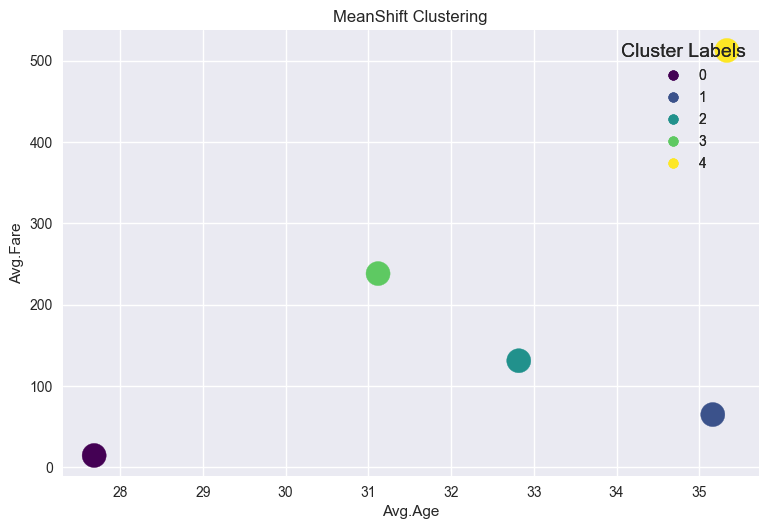

In [61]:
# Create a scatter plot of the data points with custom legend labels
scatter = plt.scatter(titanic_cluster_data['Age'], titanic_cluster_data['Fare'], c=labels_uniques,cmap='viridis', s=300)

# Add a legend to the plot
legend = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster Labels")
plt.gca().add_artist(legend)

# Set the axis labels and title
plt.title('MeanShift Clustering')
plt.xlabel('Avg.Age')
plt.ylabel('Avg.Fare')

# Show the plot
plt.show()

## Model Optimization

In [62]:
from sklearn.metrics import silhouette_score
# Range of bandwidth values to explore
bandwidths = [10.0, 25.0,35.0,50.0,74.0]

# For each bandwidth value, fit Mean Shift clustering and compute the Silhouette score
for bandwidth in bandwidths:
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data_train)
    labels = ms.labels_
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(data_train, labels)
        print("For bandwidth =", bandwidth, "the average silhouette score is :", silhouette_avg)
    else:
        print("For bandwidth =", bandwidth, "the number of clusters is 1")
# silhouette score >0.5 a strong indication of good clustering
# silhouette score <0.2 considered weak and may indicate that the data does not have a clear clustering structure.

For bandwidth = 10.0 the average silhouette score is : 0.42740419579681155
For bandwidth = 25.0 the average silhouette score is : 0.5910755143013338
For bandwidth = 35.0 the average silhouette score is : 0.682005611582051
For bandwidth = 50.0 the average silhouette score is : 0.7917491497717523
For bandwidth = 74.0 the average silhouette score is : 0.7917491497717523


In [63]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth= 35) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
ms.fit(data_train)

labels = ms.labels_
labels_unique = np.unique(labels)
labels_unique

#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
data_train['cluster_group'] = np.nan
data_length=len(data_train)
for i in range(data_length):
    data_train.iloc[i,data_train.columns.get_loc('cluster_group')] = labels[i]
data_train.head()

#Grouping passengers by Cluster
titanic_cluster_data = data_train.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
titanic_cluster_data['Counts'] = pd.Series(data_train.groupby(['cluster_group']).size())
titanic_cluster_data
# Male = 1 female = 0

,Survived,Sex,Age,Fare,familySize,isalone,Counts
cluster_group,,,,,,,
0.0,0.338422,0.681934,28.278626,18.538053,1.858779,0.642494,786
1.0,0.729412,0.388235,35.552941,100.435412,2.117647,0.294118,85
2.0,0.647059,0.352941,31.117647,238.187059,3.058824,0.294118,17
3.0,1.000000,0.666667,35.333333,512.330000,1.333333,0.666667,3


Cluster 0 i.e the 1st Cluster
Have 786 passengers
Survival rate is 33%(very low) means most of them didn't survive
Mostly Male
Average family size of 1-2, 64% likely to be alone
The average fare paid is $18

Cluster 1 i.e the 2nd Cluster
Have 85 passengers
Survival rate is 72% means most of them survived
Mostly Female
Average family size of 2-3, 29% likely to be alone
The average fare paid is $100

Cluster 2 i.e the 3rd Cluster
Have 17 passengers
Survival rate is 64% means most of them survived
Mostly Female
Average family size of 3-4, 29% likely to be alone
The average fare paid is $238 (which is far higher than the 1st cluster average fare)

Cluster 3 i.e the 4th Cluster
Have only 3 passenger (can be ignored, can consider as outliers as too little data)

For Cluster 1 and 2, they are most likely not to be alone and they have higher chance of survival. As compared to Cluster 0, they are most likely to be alone and lower chance of survival. Thus, we can conclude that passenger that survived are most likely to be Female with at least 1 family memeber travelling with them and they paid a much higher fares as compared to cluster 0.

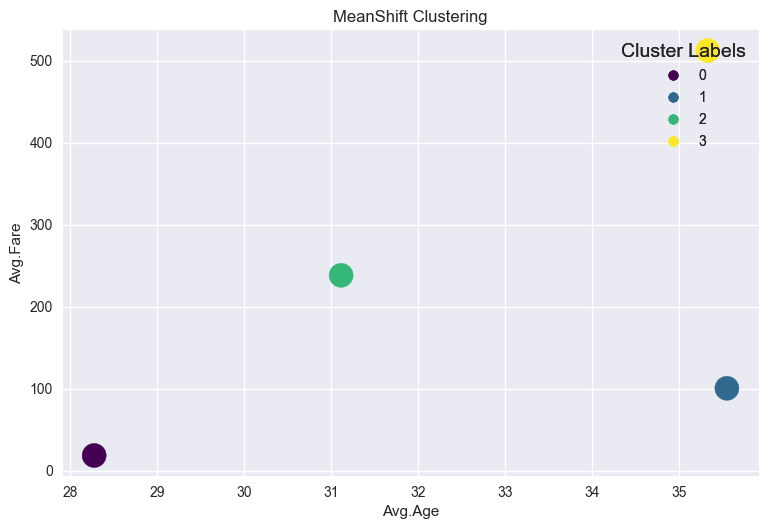

In [64]:
# Create a scatter plot of the data points with custom legend labels
# scatter = plt.scatter(data_predict['Age'], data_predict['Fare'], c=labels, cmap='viridis')
scatter = plt.scatter(titanic_cluster_data['Age'], titanic_cluster_data['Fare'], c=labels_unique, cmap='viridis', s=300)

# Add a legend to the plot
legend = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster Labels")
plt.gca().add_artist(legend)

# Set the axis labels and title
plt.title('MeanShift Clustering')
plt.xlabel('Avg.Age')
plt.ylabel('Avg.Fare')

# Show the plot
plt.show()

## Model 2: Kmeans Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

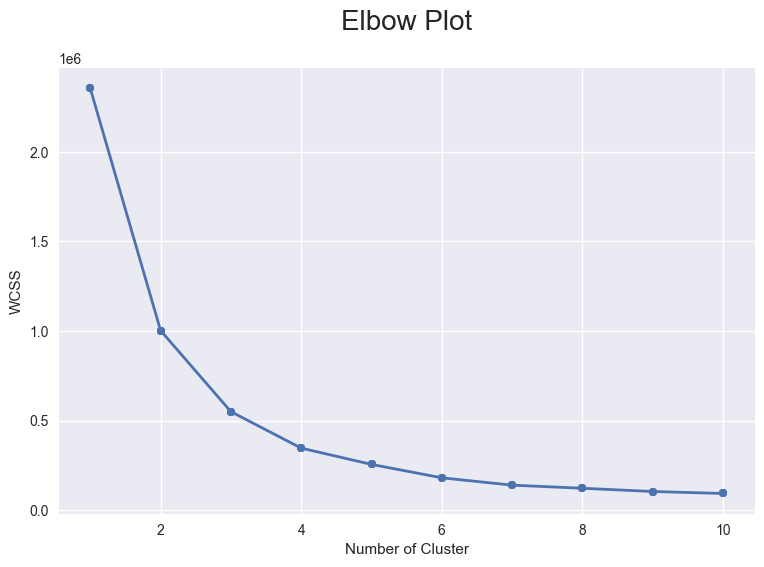

In [65]:
# Age and Fare Predictor
X = data_train.iloc[:, [2,3]].values 

# Import kMean from sklean
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show


In [66]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
print(kmeans.cluster_centers_)

[0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 1 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0
 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 2 3
 0 0 0 2 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 2 2 0 2 2 1 0 0 0 0 0 0 1 2 0 0 0 0 2 2 0 0 0 2 0 0 1
 0 2 0 2 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2
 2 0 0 2 0 2 0 1 0 0 1 0 0 2 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 0 0 0 

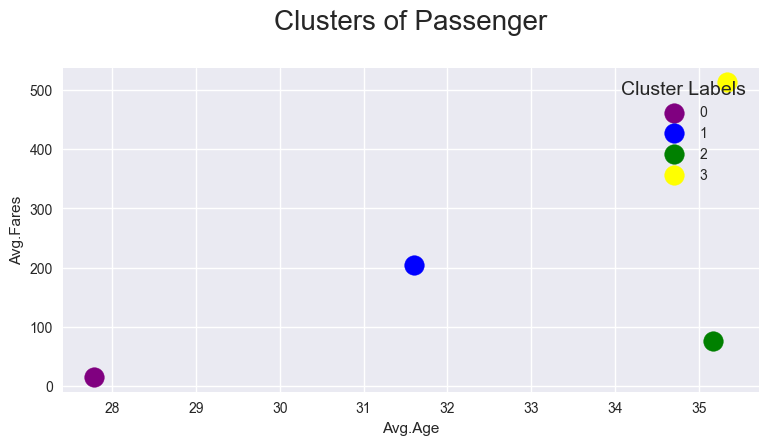

In [69]:
#Visualization
plt.figure(figsize = (8,4))
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], label='0',s=25)
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label='1',s=25)
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label='2',s=25)
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], label='3',s=25)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 50, marker='8', label='Centroids')
# Define colors for each cluster center
colors = ['purple', 'blue', 'green','yellow']

# Plot the cluster centers with different colors and labels
for i, (x, y) in enumerate(kmeans.cluster_centers_):
    plt.scatter(x, y, c=colors[i], s=200, label= str(i))

plt.title('Clusters of Passenger\n', fontsize = 20)
plt.xlabel('Avg.Age')
plt.ylabel('Avg.Fares')
plt.legend(title='Cluster Labels', loc='upper right')
plt.show()